In [1]:
import pandas as pd
import numpy as np

In [2]:
donor = pd.read_csv("/Users/zhenyuan/Desktop/stern_ra/education/merged_new.csv")
donor = donor.dropna().reset_index()
# sample = donor.sample(n=2000, random_state=1).reset_index()
# sample.to_csv(r"sample.csv")

In [3]:
donor.head()

,index,projectid,teacher_acctid,title,short_description,need_statement,essay,schoolid,school_ncesid,school_latitude,...,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,INTJ
0,25,00029fe2570371d867a69cfdde05daed,60eb9dcf81a39ee5e69fa91a0eaf514f,Nowhere To Go For Learning Center Time,Your donation will help these students and stu...,"My students need 1 computer table for two, 1 w...",No where to go for center time! I am a second ...,d9c5451507d858bd377a9795317970f5,3.600076e+11,40.718563,...,0.259494,0.008439,0.044304,0.103376,0.006329,0.082278,0.025316,0.004219,0.151899,0.002110
1,30,000308a4c89c470812b393ce91cbcb0d,848d49ee518f4d8d60293033a25e7c92,Helping Small Hands Write Big Words,Do you remember proudly coming home with your ...,"My students need materials such as scissors, w...",Do you remember proudly coming home with your ...,4378e21282e16cb4798357cd07e77c8e,6.325501e+10,37.943016,...,0.332168,0.003497,0.034965,0.090909,0.006993,0.132867,0.038462,0.003497,0.139860,0.003497
2,39,0003a7c001b549f2f4fe0fb0ba60fb22,923f35e590d86c632f1baef447e563ca,Display My Work,My project needs cork strips that can be attac...,My students need 12 natural cork board sets.,"I teach math courses (geometry, Advanced Place...",0042e6c31407a598553a35923d9457d1,3.702680e+11,35.479101,...,0.319820,0.013514,0.018018,0.094595,0.004505,0.144144,0.013514,0.004505,0.144144,0.004505
3,78,0008499ed121a9798d6ed200112f8df0,1f1783b4ad5be670de232dfe9637b72e,"What is this Place Called Earth, and What is B...",My students will be able to discover what the ...,My students need a Weather and Solar System Ac...,"Louise Boyd Cadwell said, ""In the Reggio Emili...",ce1a5988c45bda47752110a333ba4cd3,1.709930e+11,41.877188,...,0.223618,0.010050,0.040201,0.082915,0.105528,0.153266,0.027638,0.002513,0.145729,0.002513
4,88,000922ac2f6de95b1962536fcc29b3ee,25e273a0d1e434b3176cc033405ed8ac,"We Hear You Loud & Clear, Junie B. Jones!","I introduced many of my students to Junie B., ...","My students need Junie B. Jones Books Set 1, a...",Have you ever met a kindergarten or first grad...,e965ea3a3658ed793bc42f3eea89fb39,4.702940e+11,35.214108,...,0.243986,0.003436,0.034364,0.120275,0.058419,0.113402,0.020619,0.003436,0.127148,0.006873


In [4]:
print(donor["title"][0])
print(donor["need_statement"][0])
print(donor["short_description"][0])
print(donor["essay"][0])

Nowhere To Go For Learning Center Time
My students need 1 computer table for two, 1 writing center, and 1 listening center.
Your donation will help these students and students for years to come as furniture last a lifetime. It will make the students' days when they sit at the centers knowing that it was provided by someone out there who have filled their buckets.
\nSure we could make do with what we have, but it cuts into our learning time if I must move things in order to change the learning environment. It would be better if we had the center furniture in place for them to go to when it is their time to visit the centers.


ADJ: adjective
ADP: adposition
ADV: adverb
AUX: auxiliary verb
CONJ: coordinating conjunction
DET: determiner
INTJ: interjection
NOUN: noun
NUM: numeral
PART: particle
PRON: pronoun
PROPN: proper noun
PUNCT: punctuation
SCONJ: subordinating conjunction
SYM: symbol
VERB: verb
X: other

Flesch_Kincaid: indicate how difficult a passage in English is to understand
Gunning_Fog_Index: The index estimates the years of formal education a person needs to understand the text on the first reading
Coleman_Liau:Like the Flesch–Kincaid Grade Level, Gunning fog index, SMOG index, and Automated Readability Index, its output approximates the U.S. grade level thought necessary to comprehend the text.
SMOG, Automated_Readability_Index
GUESS: the average of all metric - Average_Grade_Level, sd
ave_sentiment

In [5]:
donor["school_ncesid"] = pd.to_numeric(donor["school_ncesid"], errors='coerce')
donor["ncesid"] = donor["school_ncesid"]//100000

In [6]:
edu = pd.read_csv("/Users/zhenyuan/Desktop/stern_ra/education/seda_cov_geodist_pool_4.1.csv")
edu.dropna(subset=['stateabb'],inplace=True)
edu.head()

,sedalea,sedaleaname,fips,gslo,gshi,urban,suburb,town,rural,locale_city_large,...,single_momavgnam,lninc50avgwht,baplusavgwht,unempavgwht,snapavgwht,povertyavgwht,single_momavgwht,sesavgwhtasn,sesavgwhtnam,stateabb
1,100005,ALBERTVILLE CITY ...,1.0,Pre-Kindergarten,12.0,0.000000,0.000000,1.0,0.000000,0.0,...,NaN,10.619657,0.169409,0.050287,0.123366,0.145456,0.188357,NaN,NaN,AL
2,100006,MARSHALL COUNTY ...,1.0,Pre-Kindergarten,12.0,0.000000,0.000000,0.0,1.000000,0.0,...,NaN,10.642805,0.156443,0.059775,0.100053,0.170544,0.143026,NaN,NaN,AL
3,100007,HOOVER CITY ...,1.0,Pre-Kindergarten,12.0,0.824832,0.023582,0.0,0.151586,0.0,...,NaN,11.375733,0.580834,0.035678,0.014498,0.042751,0.089783,-0.204784,NaN,AL
4,100008,MADISON CITY ...,1.0,Pre-Kindergarten,12.0,0.000000,0.959768,0.0,0.040232,0.0,...,NaN,11.420951,0.565781,0.041800,0.017530,0.043883,0.091545,-0.162351,NaN,AL
5,100011,LEEDS CITY ...,1.0,Pre-Kindergarten,12.0,0.000000,0.600000,0.4,0.000000,0.0,...,NaN,10.919168,0.295217,0.060074,0.055920,0.086047,0.155262,NaN,NaN,AL


'sedalea', 'sedaleaname', 'fips', 'gslo', 'gshi', 'urban', 'suburb',
'town', 'rural', 'locale_city_large', 'locale_city_midsize',
'locale_city_small', 'locale_suburb_large', 'locale_suburb_midsize',
'locale_suburb_small', 'locale_town_fringe', 'locale_town_distant',
'locale_town_remote', 'locale_rural_fringe', 'locale_rural_distant',
'locale_rural_remote', 'avgrdall', 'pernam', 'perasn', 'perhsp',
'perblk', 'perwht', 'perfl', 'perrl', 'perfrl', 'perecd', 'perell',
'perspeced', 'totenrl', 'diffexpecd_blkwht', 'diffexpecd_hspwht',
'diffexpecd_namwht', 'diffexpecd_asnwht', 'hswhtblk', 'hswhthsp',
'hsflnfl', 'hsecdnec', 'rswhtblk', 'rswhthsp', 'rsflnfl', 'rsecdnec',
'diffexpmin2_blkwht', 'diffexpmin2_hspwht', 'diffexpmin2_namwht',
'diffexpmin2_asnwht', 'sesavgall', 'sesavgasn', 'sesavgblk',
'sesavghsp', 'sesavgnam', 'sesavgwht', 'sesavgwhtblk', 'sesavgwhthsp',
'lninc50avgall', 'baplusavgall', 'unempavgall', 'snapavgall',
'povertyavgall', 'single_momavgall', 'lninc50avgasn', 'baplusavgasn',
'unempavgasn', 'snapavgasn', 'povertyavgasn', 'single_momavgasn',
'lninc50avgblk', 'baplusavgblk', 'unempavgblk', 'snapavgblk',
'povertyavgblk', 'single_momavgblk', 'lninc50avghsp', 'baplusavghsp',
'unempavghsp', 'snapavghsp', 'povertyavghsp', 'single_momavghsp',
'lninc50avgnam', 'baplusavgnam', 'unempavgnam', 'snapavgnam',
'povertyavgnam', 'single_momavgnam', 'lninc50avgwht', 'baplusavgwht',
'unempavgwht', 'snapavgwht', 'povertyavgwht', 'single_momavgwht',
'sesavgwhtasn', 'sesavgwhtnam', 'stateabb'

## Calculate Top 20% and Bottom 20%

In [7]:
donor[donor.columns[:40]].teacher_prefix.unique()

array(['Mrs.', 'Ms.', 'Mr.', 'Dr.'], dtype=object)

In [8]:
donor[donor["teacher_prefix"]=='Mrs.']

,index,projectid,teacher_acctid,title,short_description,need_statement,essay,schoolid,school_ncesid,school_latitude,...,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,INTJ,ncesid
0,25,00029fe2570371d867a69cfdde05daed,60eb9dcf81a39ee5e69fa91a0eaf514f,Nowhere To Go For Learning Center Time,Your donation will help these students and stu...,"My students need 1 computer table for two, 1 w...",No where to go for center time! I am a second ...,d9c5451507d858bd377a9795317970f5,3.600076e+11,40.718563,...,0.008439,0.044304,0.103376,0.006329,0.082278,0.025316,0.004219,0.151899,0.002110,3600076.0
2,39,0003a7c001b549f2f4fe0fb0ba60fb22,923f35e590d86c632f1baef447e563ca,Display My Work,My project needs cork strips that can be attac...,My students need 12 natural cork board sets.,"I teach math courses (geometry, Advanced Place...",0042e6c31407a598553a35923d9457d1,3.702680e+11,35.479101,...,0.013514,0.018018,0.094595,0.004505,0.144144,0.013514,0.004505,0.144144,0.004505,3702680.0
3,78,0008499ed121a9798d6ed200112f8df0,1f1783b4ad5be670de232dfe9637b72e,"What is this Place Called Earth, and What is B...",My students will be able to discover what the ...,My students need a Weather and Solar System Ac...,"Louise Boyd Cadwell said, ""In the Reggio Emili...",ce1a5988c45bda47752110a333ba4cd3,1.709930e+11,41.877188,...,0.010050,0.040201,0.082915,0.105528,0.153266,0.027638,0.002513,0.145729,0.002513,1709930.0
4,88,000922ac2f6de95b1962536fcc29b3ee,25e273a0d1e434b3176cc033405ed8ac,"We Hear You Loud & Clear, Junie B. Jones!","I introduced many of my students to Junie B., ...","My students need Junie B. Jones Books Set 1, a...",Have you ever met a kindergarten or first grad...,e965ea3a3658ed793bc42f3eea89fb39,4.702940e+11,35.214108,...,0.003436,0.034364,0.120275,0.058419,0.113402,0.020619,0.003436,0.127148,0.006873,4702940.0
6,124,000c8197849c5f4220faf84a8c920f73,a7566eaf78225fbe99321106a440556e,Into a Spellbinding Story!,"...Why should it be different in books?"" This ...","My students need 37 copies of ""Inkheart"" and 1...","Why are you looking at me like that?"" he cried...",e3029fad3ee9715997061c7735c30be9,1.709930e+11,41.811252,...,0.010989,0.032967,0.140659,0.019780,0.140659,0.017582,0.002198,0.149451,0.002198,1709930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21897,663817,ffe54427a169c1ff1ce9eee1a46842ef,ee8eeab77df2f8e1fcb15fd257df2456,A Wonderful World of Words!,"MOTIVATION, MOTIVATION and more MOTIVATION! Th...","My students need varied materials, like 2 sigh...","MOTIVATION, MOTIVATION and more MOTIVATION! Th...",e4c66f9e45f3f43c2b19eb45b0df0f79,9.004500e+10,41.191926,...,0.011858,0.047431,0.142292,0.043478,0.114625,0.031621,0.003953,0.169960,0.003953,900450.0
21898,663838,ffe71c8e95fd3ce7c14f3143563ca0d6,1fd314adbbd872a7114871c1c5deaece,Building Brainpower,My ultimate goal is to ensure my students will...,"My students need non-power drills, nails, plyw...",We are ready for Real World Learning experienc...,40d5109d68bde2000f520726b9c4b359,5.109500e+10,35.703457,...,0.006135,0.040900,0.087935,0.028630,0.128834,0.012270,0.004090,0.137014,0.002045,510950.0
21899,663902,ffed0357d2f18e2a0fe76cba71509f32,c6ad20befc52e31a7d24e6e9d44b24e0,That's It!,Imagine struggling daily with issues no one in...,My students need leveled reading work stations...,Imagine struggling daily with issues no one in...,7508b345166bc49b0bde4f875277cfb9,1.908970e+11,41.525387,...,0.008982,0.041916,0.107784,0.002994,0.095808,0.020958,0.005988,0.146707,0.002994,1908970.0
21900,663982,fff3bf834686b20ed7e518e7521b4a36,ceff88f077923a1858871ef1d68c3df6,Headlands Institute or Bust!,Every year we take our 6th grade students to H...,My students need transportation to Headlands I...,My partner and I take our 6th grade students t...,9fdfc5617d4e97b6b5ed78d979858da5,6.013321e+10,38.698114,...,0.013274,0.035398,0.119469,0.030973,0.146018,0.017699,0.004425,0.159292,0.004425,601332.0


In [9]:
donor[donor["teacher_prefix"]=='Mr.']

,index,projectid,teacher_acctid,title,short_description,need_statement,essay,schoolid,school_ncesid,school_latitude,...,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,INTJ,ncesid
5,98,000a2e4071115ad106134359b25dd13f,9d45a62ab2d0b1d15e74e13d66ac8309,"Help Create a Class of Life-long Readers, Part II",I plan on implementing a series of student led...,"My project needs 10 copies of 4 book titles, i...",I teach sixth grade English Language Arts in t...,749a86fbb031ad5180381e9e6b9684a9,3.600086e+11,40.840446,...,0.009174,0.032110,0.064220,0.087156,0.160550,0.027523,0.004587,0.133028,0.004587,3600086.0
8,209,001425cb86b079295e80f5d980b446ce,f80d52290d2052061b906ac2051649ac,Seas of Change,Urban education is one of the most challenging...,My students need aquarium supplies that includ...,Urban education is one of the most challenging...,1bc8d08e656a73c2d05c3f3fbfd4d606,1.100030e+11,38.896353,...,0.019277,0.053012,0.108434,0.007229,0.091566,0.012048,0.004819,0.130120,0.002410,1100030.0
17,575,0039896faf8bdd71639b82d4337f5266,598b6c82790cab79b2c29a3e79cc6f7b,Mr. D's Classroom Needs Resources,I often introduce my students to supplemental ...,My students need 1 toner cartridge and 1 drum ...,I teach a great group of well-deserving 8th gr...,27ca25b3deef58918fb27a8285240823,2.800870e+11,33.949237,...,0.018405,0.030675,0.098160,0.006135,0.098160,0.018405,0.006135,0.122699,0.006135,2800870.0
22,691,0046138bdc070263ad65b9ff38146862,e7dbcca3e6456528871fb24f34873c5f,Learn and Serve in the Dominican Republic,Do you remember the first time you traveled to...,My students need the cost of travel expenses t...,Do you remember the first time you traveled to...,0fed06d1922bd537f84f3d78629de7cb,1.100030e+11,38.840233,...,0.014670,0.019560,0.090465,0.029340,0.119804,0.019560,0.009780,0.110024,0.002445,1100030.0
30,860,0055b93de046b4fc2620cf7f07ff41bb,ca734637fc0cb13c6994cc6997af7c02,"Einsteins Loved Poppy, Let's Read Poppy And Rye","Despite their constraints, my students are eag...","My students need 21 copies of the book ""Poppy ...",I teach 4th grade bilingual students in a Titl...,edb780d26acab5723b94b59ec5dc8068,4.820340e+11,32.922253,...,0.009317,0.031056,0.114907,0.043478,0.121118,0.015528,0.003106,0.136646,0.003106,4820340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21856,662656,ff7942dbffdcbd4222612361a902d588,c46647580fc99c3244d8b5599c61e127,Prototype Creation Through 3-D Printing,My classroom is challenging and fun! Students ...,My students need the MakerBot Academy 3D Print...,My classroom is challenging and fun! Students...,4b4d3854832da162f94842660a222767,4.900600e+11,40.645260,...,0.012295,0.040984,0.112705,0.004098,0.127049,0.016393,0.002049,0.143443,0.002049,4900600.0
21869,663039,ff9d45023b6d9ce8a1f9a402af310912,4dca61dd1817ffed21f2ae4391dc7757,Using Technology to Inspire Learning,A projector will allow me to show them the DVD...,My students need a micro projector and a prote...,This is a Title One school with a diverse cult...,1015833afe748abd517ba4a8b1de13c5,3.702970e+11,35.262257,...,0.011472,0.038241,0.118547,0.036329,0.086042,0.028681,0.001912,0.135755,0.003824,3702970.0
21871,663135,ffa64e5863f02f6e82107201b7498538,e7a30d89c45f32e9f97afff4aa4cd469,Writing Time,Simply by having a supply of high quality Tico...,My students need to have 100 boxes of Ticonder...,My classroom consists of twenty-seven 5th grad...,c94c6aeb1763861f8db019fc7151821a,2.615390e+11,43.131977,...,0.038462,0.057692,0.076923,0.012821,0.102564,0.025641,0.006410,0.185897,0.006410,2615390.0
21872,663189,ffaad8881abbd1b2464342768afcda79,5a4b0f48e3e032790973a82e2b923a0a,Oh Brother! That's a Print.,I work in the most economically depressed area...,My students need an all purpose printer/copier...,I work in the most economically depressed area...,0588a95b906b7d988dff47193b8ed6e1,3.600085e+11,40.822187,...,0.005618,0.053371,0.123596,0.022472,0.129213,0.016854,0.002809,0.165730,0.002809,3600085.0


In [10]:
top20 = edu[["stateabb","perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
 "unempavgall","povertyavgall","single_momavgall"]].groupby('stateabb').quantile(.8)
bot20 = edu[["stateabb","perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
 "unempavgall","povertyavgall","single_momavgall"]].groupby('stateabb').quantile(.2)

In [11]:
data = pd.merge(donor,edu,how='left',left_on="ncesid",right_on="sedalea")
data.dropna(subset=["stateabb"],inplace=True)
data = pd.merge(data,top20,how='left', on="stateabb",suffixes=('', '_top20'))
data = pd.merge(data,bot20,how='left', on="stateabb",suffixes=('', '_bot20'))

In [12]:
cols = ["perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
        "unempavgall","povertyavgall","single_momavgall"]
for col in cols:
    data.loc[(data[col] >= data[col+'_top20']),col+'_Per'] = 1
    data.loc[(data[col] < data[col+'_bot20']),col+'_Per'] = 0
    data[col+'_Per'].fillna(99, inplace=True)


In [13]:
## n_mentions dropped b/c no variation
data = data[['n_chars', 'n_digits', 'n_extraspaces', 'n_hashtags',
       'n_lowers', 'n_lowersp', 'n_periods', 'n_urls', 'n_words',
       'n_caps', 'n_nonasciis', 'n_capsp', 'n_charsperword', 'Average_Grade_Level', 
       'ave_sentiment', 'n_commas', 'n_exclaims', 'n_puncts', 'ADJ', 'ADP',
       'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN',
       'PUNCT', 'SCONJ', 'SYM', 'VERB', 'INTJ',
    "perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
 "unempavgall","povertyavgall","single_momavgall",
             'perblk_Per', 'perwht_Per', 'perfl_Per',
       'sesavgall_Per', 'lninc50avgall_Per', 'snapavgall_Per',
       'unempavgall_Per', 'povertyavgall_Per', 'single_momavgall_Per']]

In [14]:
data.to_csv(r'/Users/zhenyuan/Desktop/stern_ra/education/data.csv')

In [15]:
data = pd.read_csv('/Users/zhenyuan/Desktop/stern_ra/education/data.csv',index_col=0)

In [16]:
data[data["lninc50avgall_Per"]==1].shape

(4955, 52)

In [17]:
data.columns

Index(['n_chars', 'n_digits', 'n_extraspaces', 'n_hashtags', 'n_lowers',
       'n_lowersp', 'n_periods', 'n_urls', 'n_words', 'n_caps', 'n_nonasciis',
       'n_capsp', 'n_charsperword', 'Average_Grade_Level', 'ave_sentiment',
       'n_commas', 'n_exclaims', 'n_puncts', 'ADJ', 'ADP', 'ADV', 'AUX',
       'CCONJ', 'DET', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT',
       'SCONJ', 'SYM', 'VERB', 'INTJ', 'perblk', 'perwht', 'perfl',
       'sesavgall', 'lninc50avgall', 'snapavgall', 'unempavgall',
       'povertyavgall', 'single_momavgall', 'perblk_Per', 'perwht_Per',
       'perfl_Per', 'sesavgall_Per', 'lninc50avgall_Per', 'snapavgall_Per',
       'unempavgall_Per', 'povertyavgall_Per', 'single_momavgall_Per'],
      dtype='object')

In [18]:
data[data["lninc50avgall_Per"]==0]

,n_chars,n_digits,n_extraspaces,n_hashtags,n_lowers,n_lowersp,n_periods,n_urls,n_words,n_caps,...,single_momavgall,perblk_Per,perwht_Per,perfl_Per,sesavgall_Per,lninc50avgall_Per,snapavgall_Per,unempavgall_Per,povertyavgall_Per,single_momavgall_Per
6,1500.0,6.0,3.0,0.0,1407.0,0.938041,14.0,0.0,319.0,46.0,...,0.459904,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
7,756.0,3.0,7.0,0.0,700.0,0.926024,10.0,0.0,163.0,23.0,...,0.370046,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
17,757.0,2.0,8.0,0.0,719.0,0.949868,9.0,0.0,167.0,15.0,...,0.171726,0.0,1.0,99.0,99.0,0.0,1.0,99.0,99.0,99.0
33,1822.0,19.0,3.0,0.0,1704.0,0.935272,25.0,0.0,386.0,45.0,...,0.494582,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
34,2169.0,6.0,9.0,0.0,2034.0,0.937788,24.0,0.0,424.0,58.0,...,0.298427,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,779.0,1.0,3.0,0.0,738.0,0.947436,7.0,0.0,144.0,22.0,...,0.374252,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
18937,2138.0,7.0,22.0,0.0,2040.0,0.954184,23.0,0.0,398.0,30.0,...,0.427008,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
18941,1040.0,6.0,11.0,0.0,973.0,0.935639,13.0,0.0,230.0,26.0,...,0.090896,0.0,1.0,1.0,0.0,0.0,1.0,99.0,99.0,0.0
18951,1270.0,1.0,3.0,0.0,1173.0,0.923682,14.0,0.0,253.0,60.0,...,0.367651,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


### Autoencoders
https://github.com/aapatel09/handson-unsupervised-learning/blob/master/08_autoencoders.ipynb

Precision is defined as the number of true positives over the number of true positives plus the number of false positives

Recall is defined as the number of true positives over the number of true positives plus the number of false negatives

In [19]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algos'''
import lightgbm as lgb

'''TensorFlow and Keras'''
import tensorflow as tf
from tensorflow import keras
K = keras.backend

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy

In [20]:
import sys, sklearn
print(f'sklearn    {sklearn.__version__}')
print(f'tensorflow {tf.__version__}')
print(f'keras      {keras.__version__}')
print(f'numpy      {np.__version__}')

sklearn    0.22.2.post1
tensorflow 1.15.5
keras      2.2.4-tf
numpy      1.17.2


In [21]:
# To make the output stable across runs
tf.random.set_random_seed(1234)
np.random.seed(1234)

In [22]:
ylist = ['perblk_Per','perwht_Per',
       'perfl_Per', 'sesavgall_Per', 'lninc50avgall_Per', 'snapavgall_Per',
       'unempavgall_Per', 'povertyavgall_Per', 'single_momavgall_Per']
i=3
datai = data.copy().drop(ylist[:i]+ylist[i+1:],axis=1)
datai = datai[datai[ylist[i]]!=99]
dataX = datai.copy().drop([ylist[i]],axis=1)
dataY = datai.copy()[ylist[i]]

In [23]:
dataX

,n_chars,n_digits,n_extraspaces,n_hashtags,n_lowers,n_lowersp,n_periods,n_urls,n_words,n_caps,...,INTJ,perblk,perwht,perfl,sesavgall,lninc50avgall,snapavgall,unempavgall,povertyavgall,single_momavgall
2,2045.0,10.0,4.0,0.0,1894.0,0.926197,17.0,0.0,398.0,63.0,...,0.002513,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038
3,2069.0,7.0,6.0,0.0,1924.0,0.929952,24.0,0.0,455.0,59.0,...,0.002198,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038
5,2106.0,11.0,2.0,0.0,2026.0,0.962031,21.0,0.0,415.0,25.0,...,0.002410,0.747490,0.093937,0.704828,0.020762,11.128137,0.121629,0.084816,0.175378,0.366529
6,1500.0,6.0,3.0,0.0,1407.0,0.938041,14.0,0.0,319.0,46.0,...,0.009404,0.615902,0.101581,0.807494,-2.017120,10.368602,0.295630,0.111070,0.306819,0.459904
7,756.0,3.0,7.0,0.0,700.0,0.926024,10.0,0.0,163.0,23.0,...,0.006135,0.566714,0.222707,0.748608,-1.516906,10.425287,0.207346,0.125291,0.278382,0.370046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18952,2381.0,5.0,4.0,0.0,2257.0,0.947943,26.0,0.0,489.0,49.0,...,0.002045,0.788575,0.183392,0.788385,-1.859054,10.294223,0.216526,0.095739,0.301476,0.354927
18953,1596.0,6.0,17.0,0.0,1524.0,0.954915,16.0,0.0,334.0,25.0,...,0.002994,0.190631,0.479131,0.623469,-0.198827,10.769401,0.166756,0.063218,0.158141,0.233906
18954,1185.0,2.0,4.0,0.0,1109.0,0.935919,17.0,0.0,226.0,32.0,...,0.004425,0.149848,0.321962,0.744699,-0.752891,10.732240,0.168259,0.090207,0.211663,0.256123
18955,2251.0,8.0,13.0,0.0,2129.0,0.945826,28.0,0.0,506.0,54.0,...,0.001976,0.057664,0.793897,0.460050,0.047187,10.812994,0.129637,0.066748,0.125135,0.196005


In [24]:
def train_model(dataX,dataY):
    X_train, X_test, y_train, y_test = train_test_split(
                                        dataX, dataY, test_size=0.33, 
                                        random_state=1234, stratify=dataY)
    pd.set_option('mode.chained_assignment', None)
    featuresToScale = dataX.columns
    sX = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
    X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
    X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])
    X_train_AE, X_test_AE = X_train.copy(), X_test.copy()
    # Call neural network API
    model = Sequential()

    # Apply linear activation function to input layer
    # Generate hidden layer with 29 nodes, the same as the input layer
    model.add(Dense(units=34, activation='linear',input_dim=34))

    # Apply linear activation function to hidden layer
    # Generate output layer with 29 nodes
    model.add(Dense(units=34, activation='linear'))
    # Compile the model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    # Train the model
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds = plotResults(y_test, anomalyScoresAE, True)
    model.reset_states()

In [25]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - 
                   np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [26]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'], 
                               preds['anomalyScore'])
    average_precision = average_precision_score( 
                        preds['trueLabel'], preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
        {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], 
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the \
        curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds, average_precision

In [28]:
data

,n_chars,n_digits,n_extraspaces,n_hashtags,n_lowers,n_lowersp,n_periods,n_urls,n_words,n_caps,...,single_momavgall,perblk_Per,perwht_Per,perfl_Per,sesavgall_Per,lninc50avgall_Per,snapavgall_Per,unempavgall_Per,povertyavgall_Per,single_momavgall_Per
0,1436.0,3.0,4.0,0.0,1373.0,0.956159,11.0,0.0,286.0,18.0,...,0.223714,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,1.0
1,1101.0,3.0,13.0,0.0,1040.0,0.944646,13.0,0.0,222.0,20.0,...,0.162085,99.0,1.0,0.0,99.0,1.0,99.0,99.0,99.0,99.0
2,2045.0,10.0,4.0,0.0,1894.0,0.926197,17.0,0.0,398.0,63.0,...,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0
3,2069.0,7.0,6.0,0.0,1924.0,0.929952,24.0,0.0,455.0,59.0,...,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0
4,2202.0,2.0,11.0,0.0,2118.0,0.961870,22.0,0.0,435.0,25.0,...,0.177371,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18954,1185.0,2.0,4.0,0.0,1109.0,0.935919,17.0,0.0,226.0,32.0,...,0.256123,1.0,99.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0
18955,2251.0,8.0,13.0,0.0,2129.0,0.945826,28.0,0.0,506.0,54.0,...,0.196005,1.0,0.0,1.0,0.0,99.0,1.0,1.0,99.0,1.0
18956,1523.0,13.0,11.0,0.0,1450.0,0.952100,17.0,0.0,293.0,19.0,...,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0
18957,2368.0,3.0,5.0,0.0,2143.0,0.905023,29.0,0.0,500.0,132.0,...,0.340375,1.0,0.0,99.0,99.0,1.0,99.0,99.0,99.0,1.0


perblk_Per
Train on 8828 samples, validate on 8828 samples
Epoch 1/10
8828/8828 [==============================] - 0s 43us/sample - loss: 0.7758 - acc: 0.2647 - val_loss: 0.3171 - val_acc: 0.5112
Epoch 2/10
8828/8828 [==============================] - 0s 33us/sample - loss: 0.2091 - acc: 0.6422 - val_loss: 0.1201 - val_acc: 0.7387
Epoch 3/10
8828/8828 [==============================] - 0s 33us/sample - loss: 0.0870 - acc: 0.7994 - val_loss: 0.0540 - val_acc: 0.8453
Epoch 4/10
8828/8828 [==============================] - 0s 33us/sample - loss: 0.0421 - acc: 0.8715 - val_loss: 0.0304 - val_acc: 0.8772
Epoch 5/10
8828/8828 [==============================] - 0s 33us/sample - loss: 0.0210 - acc: 0.9005 - val_loss: 0.0131 - val_acc: 0.9183
Epoch 6/10
8828/8828 [==============================] - 0s 32us/sample - loss: 0.0119 - acc: 0.9213 - val_loss: 0.0075 - val_acc: 0.9307
Epoch 7/10
8828/8828 [==============================] - 0s 35us/sample - loss: 0.0070 - acc: 0.9319 - val_loss: 0.0050 

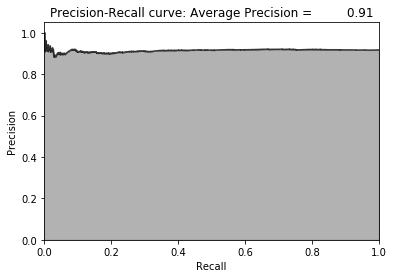

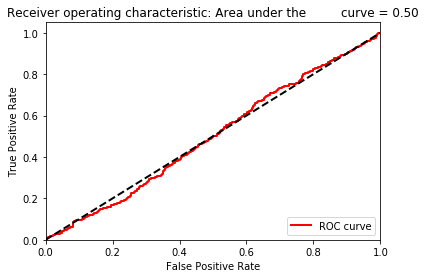

perwht_Per
Train on 8337 samples, validate on 8337 samples
Epoch 1/10
8337/8337 [==============================] - 0s 45us/sample - loss: 0.6558 - acc: 0.3067 - val_loss: 0.2434 - val_acc: 0.5638
Epoch 2/10
8337/8337 [==============================] - 0s 33us/sample - loss: 0.1565 - acc: 0.6799 - val_loss: 0.0928 - val_acc: 0.7602
Epoch 3/10
8337/8337 [==============================] - 0s 34us/sample - loss: 0.0648 - acc: 0.8159 - val_loss: 0.0381 - val_acc: 0.8617
Epoch 4/10
8337/8337 [==============================] - 0s 33us/sample - loss: 0.0266 - acc: 0.8852 - val_loss: 0.0159 - val_acc: 0.9092
Epoch 5/10
8337/8337 [==============================] - 0s 34us/sample - loss: 0.0125 - acc: 0.9196 - val_loss: 0.0084 - val_acc: 0.9292
Epoch 6/10
8337/8337 [==============================] - 0s 33us/sample - loss: 0.0071 - acc: 0.9328 - val_loss: 0.0054 - val_acc: 0.9357
Epoch 7/10
8337/8337 [==============================] - 0s 33us/sample - loss: 0.0048 - acc: 0.9401 - val_loss: 0.0041 

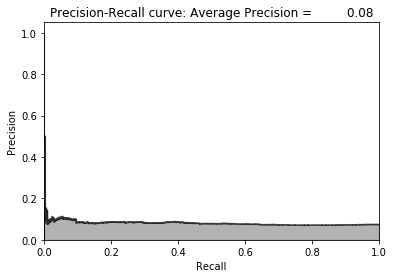

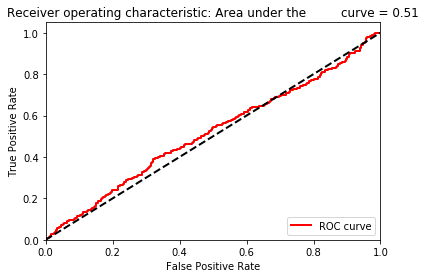

perfl_Per
Train on 6200 samples, validate on 6200 samples
Epoch 1/10
6200/6200 [==============================] - 0s 52us/sample - loss: 0.7938 - acc: 0.2334 - val_loss: 0.3315 - val_acc: 0.4584
Epoch 2/10
6200/6200 [==============================] - 0s 34us/sample - loss: 0.2154 - acc: 0.5873 - val_loss: 0.1334 - val_acc: 0.6845
Epoch 3/10
6200/6200 [==============================] - 0s 34us/sample - loss: 0.0967 - acc: 0.7384 - val_loss: 0.0643 - val_acc: 0.7876
Epoch 4/10
6200/6200 [==============================] - 0s 36us/sample - loss: 0.0470 - acc: 0.8224 - val_loss: 0.0306 - val_acc: 0.8589
Epoch 5/10
6200/6200 [==============================] - 0s 34us/sample - loss: 0.0225 - acc: 0.8784 - val_loss: 0.0150 - val_acc: 0.8987
Epoch 6/10
6200/6200 [==============================] - 0s 34us/sample - loss: 0.0116 - acc: 0.9094 - val_loss: 0.0088 - val_acc: 0.9140
Epoch 7/10
6200/6200 [==============================] - 0s 35us/sample - loss: 0.0075 - acc: 0.9219 - val_loss: 0.0065 -

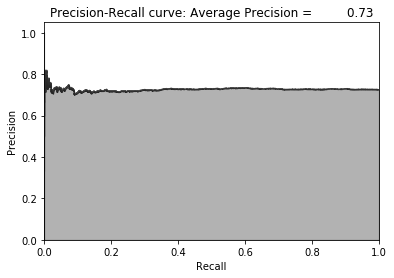

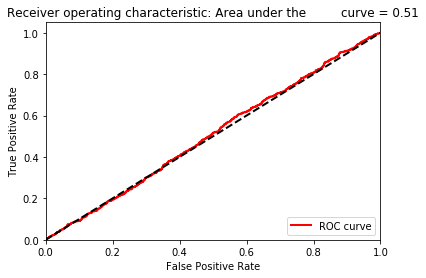

sesavgall_Per
Train on 6379 samples, validate on 6379 samples
Epoch 1/10
6379/6379 [==============================] - 0s 53us/sample - loss: 0.7115 - acc: 0.2933 - val_loss: 0.3048 - val_acc: 0.5164
Epoch 2/10
6379/6379 [==============================] - 0s 35us/sample - loss: 0.2116 - acc: 0.6412 - val_loss: 0.1391 - val_acc: 0.7335
Epoch 3/10
6379/6379 [==============================] - 0s 34us/sample - loss: 0.1038 - acc: 0.7826 - val_loss: 0.0723 - val_acc: 0.8260
Epoch 4/10
6379/6379 [==============================] - 0s 35us/sample - loss: 0.0557 - acc: 0.8566 - val_loss: 0.0380 - val_acc: 0.8751
Epoch 5/10
6379/6379 [==============================] - 0s 35us/sample - loss: 0.0302 - acc: 0.8903 - val_loss: 0.0200 - val_acc: 0.9056
Epoch 6/10
6379/6379 [==============================] - 0s 44us/sample - loss: 0.0162 - acc: 0.9114 - val_loss: 0.0113 - val_acc: 0.9204
Epoch 7/10
6379/6379 [==============================] - 0s 41us/sample - loss: 0.0095 - acc: 0.9227 - val_loss: 0.00

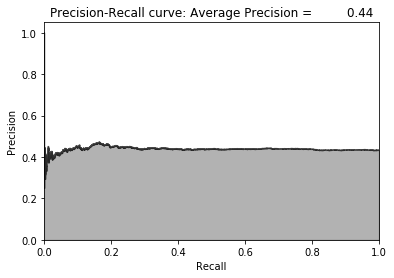

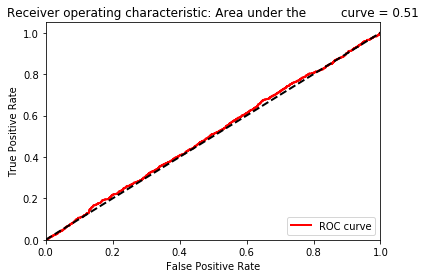

lninc50avgall_Per
Train on 5203 samples, validate on 5203 samples
Epoch 1/10
5203/5203 [==============================] - 0s 60us/sample - loss: 0.8817 - acc: 0.2116 - val_loss: 0.4152 - val_acc: 0.4028
Epoch 2/10
5203/5203 [==============================] - 0s 35us/sample - loss: 0.2881 - acc: 0.5266 - val_loss: 0.1904 - val_acc: 0.6268
Epoch 3/10
5203/5203 [==============================] - 0s 35us/sample - loss: 0.1462 - acc: 0.6944 - val_loss: 0.1017 - val_acc: 0.7509
Epoch 4/10
5203/5203 [==============================] - 0s 35us/sample - loss: 0.0781 - acc: 0.7878 - val_loss: 0.0545 - val_acc: 0.8211
Epoch 5/10
5203/5203 [==============================] - 0s 36us/sample - loss: 0.0430 - acc: 0.8457 - val_loss: 0.0302 - val_acc: 0.8653
Epoch 6/10
5203/5203 [==============================] - 0s 35us/sample - loss: 0.0251 - acc: 0.8778 - val_loss: 0.0176 - val_acc: 0.8903
Epoch 7/10
5203/5203 [==============================] - 0s 38us/sample - loss: 0.0142 - acc: 0.8974 - val_loss: 

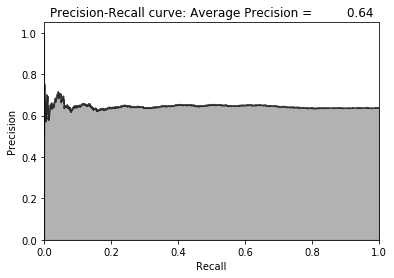

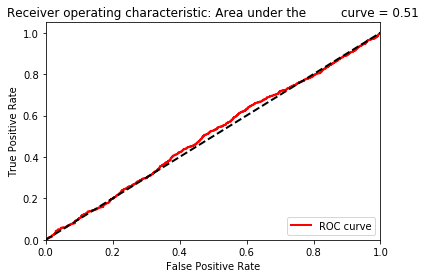

snapavgall_Per
Train on 6178 samples, validate on 6178 samples
Epoch 1/10
6178/6178 [==============================] - 0s 58us/sample - loss: 0.7653 - acc: 0.2396 - val_loss: 0.3332 - val_acc: 0.4699
Epoch 2/10
6178/6178 [==============================] - 0s 37us/sample - loss: 0.2278 - acc: 0.5858 - val_loss: 0.1497 - val_acc: 0.6789
Epoch 3/10
6178/6178 [==============================] - 0s 35us/sample - loss: 0.1103 - acc: 0.7413 - val_loss: 0.0741 - val_acc: 0.7980
Epoch 4/10
6178/6178 [==============================] - 0s 36us/sample - loss: 0.0531 - acc: 0.8313 - val_loss: 0.0333 - val_acc: 0.8621
Epoch 5/10
6178/6178 [==============================] - 0s 36us/sample - loss: 0.0241 - acc: 0.8838 - val_loss: 0.0157 - val_acc: 0.9019
Epoch 6/10
6178/6178 [==============================] - 0s 36us/sample - loss: 0.0126 - acc: 0.9121 - val_loss: 0.0094 - val_acc: 0.9197
Epoch 7/10
6178/6178 [==============================] - 0s 36us/sample - loss: 0.0081 - acc: 0.9251 - val_loss: 0.0

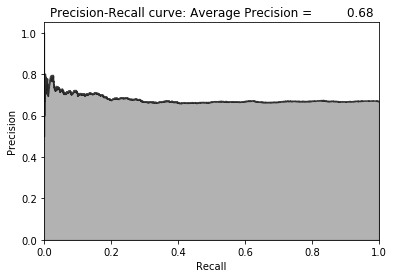

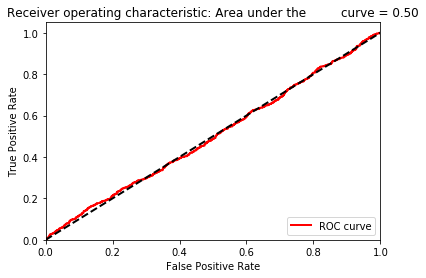

unempavgall_Per
Train on 5306 samples, validate on 5306 samples
Epoch 1/10
5306/5306 [==============================] - 0s 66us/sample - loss: 0.8830 - acc: 0.1894 - val_loss: 0.4057 - val_acc: 0.3916
Epoch 2/10
5306/5306 [==============================] - 0s 38us/sample - loss: 0.2736 - acc: 0.5160 - val_loss: 0.1778 - val_acc: 0.6282
Epoch 3/10
5306/5306 [==============================] - 0s 38us/sample - loss: 0.1350 - acc: 0.6971 - val_loss: 0.0927 - val_acc: 0.7565
Epoch 4/10
5306/5306 [==============================] - 0s 39us/sample - loss: 0.0731 - acc: 0.7978 - val_loss: 0.0528 - val_acc: 0.8274
Epoch 5/10
5306/5306 [==============================] - 0s 37us/sample - loss: 0.0419 - acc: 0.8479 - val_loss: 0.0293 - val_acc: 0.8700
Epoch 6/10
5306/5306 [==============================] - 0s 39us/sample - loss: 0.0240 - acc: 0.8835 - val_loss: 0.0166 - val_acc: 0.8971
Epoch 7/10
5306/5306 [==============================] - 0s 36us/sample - loss: 0.0140 - acc: 0.9080 - val_loss: 0.

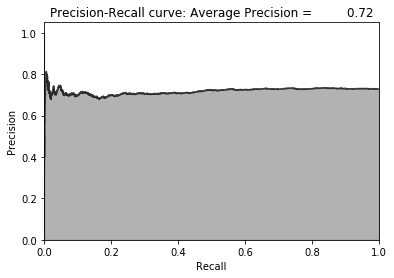

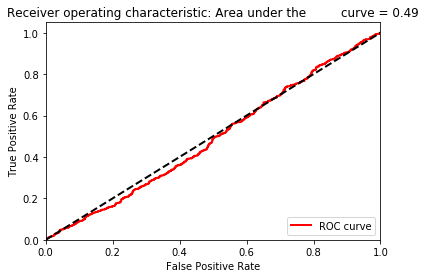

povertyavgall_Per
Train on 7037 samples, validate on 7037 samples
Epoch 1/10
7037/7037 [==============================] - 0s 63us/sample - loss: 0.7726 - acc: 0.2562 - val_loss: 0.3346 - val_acc: 0.4945
Epoch 2/10
7037/7037 [==============================] - 0s 37us/sample - loss: 0.2410 - acc: 0.6061 - val_loss: 0.1605 - val_acc: 0.6990
Epoch 3/10
7037/7037 [==============================] - 0s 40us/sample - loss: 0.1269 - acc: 0.7530 - val_loss: 0.0884 - val_acc: 0.8038
Epoch 4/10
7037/7037 [==============================] - 0s 39us/sample - loss: 0.0717 - acc: 0.8346 - val_loss: 0.0491 - val_acc: 0.8663
Epoch 5/10
7037/7037 [==============================] - 0s 38us/sample - loss: 0.0425 - acc: 0.8839 - val_loss: 0.0295 - val_acc: 0.8968
Epoch 6/10
7037/7037 [==============================] - 0s 38us/sample - loss: 0.0268 - acc: 0.9123 - val_loss: 0.0210 - val_acc: 0.9133
Epoch 7/10
7037/7037 [==============================] - 0s 36us/sample - loss: 0.0181 - acc: 0.9228 - val_loss: 

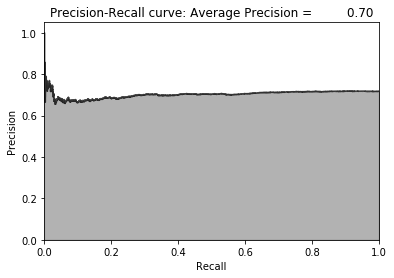

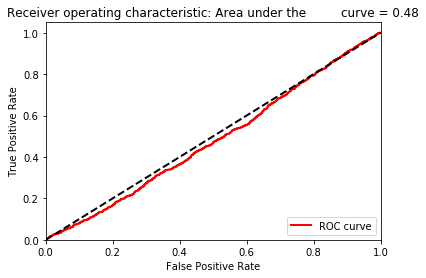

single_momavgall_Per
Train on 8121 samples, validate on 8121 samples
Epoch 1/10
8121/8121 [==============================] - 0s 58us/sample - loss: 0.7134 - acc: 0.2952 - val_loss: 0.2590 - val_acc: 0.5444
Epoch 2/10
8121/8121 [==============================] - 0s 36us/sample - loss: 0.1590 - acc: 0.6601 - val_loss: 0.0852 - val_acc: 0.7595
Epoch 3/10
8121/8121 [==============================] - 0s 37us/sample - loss: 0.0518 - acc: 0.8232 - val_loss: 0.0266 - val_acc: 0.8663
Epoch 4/10
8121/8121 [==============================] - 0s 38us/sample - loss: 0.0178 - acc: 0.8900 - val_loss: 0.0114 - val_acc: 0.9085
Epoch 5/10
8121/8121 [==============================] - 0s 38us/sample - loss: 0.0092 - acc: 0.9184 - val_loss: 0.0074 - val_acc: 0.9255
Epoch 6/10
8121/8121 [==============================] - 0s 37us/sample - loss: 0.0065 - acc: 0.9339 - val_loss: 0.0057 - val_acc: 0.9377
Epoch 7/10
8121/8121 [==============================] - 0s 37us/sample - loss: 0.0053 - acc: 0.9425 - val_los

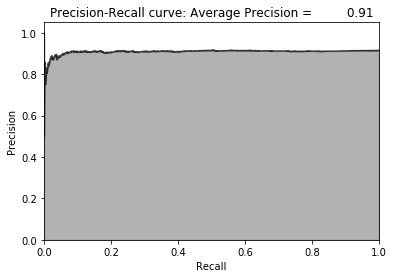

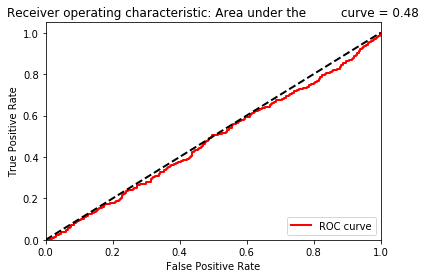

In [29]:
ylist1 = ["perblk","perwht","perfl","sesavgall","lninc50avgall","snapavgall",
 "unempavgall","povertyavgall","single_momavgall"]
ylist2 = ['perblk_Per', 'perwht_Per', 'perfl_Per',
       'sesavgall_Per', 'lninc50avgall_Per', 'snapavgall_Per',
       'unempavgall_Per', 'povertyavgall_Per', 'single_momavgall_Per']

for i in range(0,len(ylist)):
    datai = data.copy().drop(ylist1,axis=1).drop(ylist2[:i]+ylist2[i+1:],axis=1)
    datai = datai[datai[ylist2[i]]!=99]
    dataX = datai.copy().drop([ylist2[i]],axis=1)
    dataY = datai.copy()[ylist2[i]]
    print(ylist2[i])
    train_model(dataX,dataY)

## EDA and PCA

In [30]:
import os
import gc
import sys

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 140)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split as split 
from sklearn.model_selection import GridSearchCV as Grid
import xgboost as xgb
from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score,
                             confusion_matrix, accuracy_score, roc_curve, auc)

In [31]:
xlist = ['n_chars', 'n_digits', 'n_extraspaces', 'n_hashtags',
       'n_lowers', 'n_lowersp', 'n_periods', 'n_urls', 'n_words',
       'n_caps', 'n_nonasciis', 'n_capsp', 'n_charsperword', 'Average_Grade_Level', 
       'ave_sentiment', 'n_commas', 'n_exclaims', 'n_puncts', 'ADJ', 'ADP',
       'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN',
       'PUNCT', 'SCONJ', 'SYM', 'VERB', 'INTJ']

In [32]:
corr = data[xlist].corr().style.background_gradient(cmap='coolwarm')
corr

,n_chars,n_digits,n_extraspaces,n_hashtags,n_lowers,n_lowersp,n_periods,n_urls,n_words,n_caps,n_nonasciis,n_capsp,n_charsperword,Average_Grade_Level,ave_sentiment,n_commas,n_exclaims,n_puncts,ADJ,ADP,ADV,AUX,CCONJ,DET,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,INTJ
n_chars,1.000000,0.260731,0.232080,0.041517,0.998449,0.094744,0.724014,0.008768,0.978794,0.526843,0.103067,-0.076040,0.180829,0.285084,0.000802,0.221338,-0.144799,-0.095623,-0.017725,0.056980,0.048468,-0.054676,0.128143,0.046722,0.065972,-0.114325,-0.044517,-0.075670,0.003733,0.065173,0.057795,-0.240962,-0.062194,-0.441609
n_digits,0.260731,1.000000,0.081016,0.024971,0.236713,-0.343943,0.271032,0.017918,0.248642,0.269359,0.066455,0.099678,0.066345,0.049054,-0.078731,0.104538,-0.042187,0.166355,-0.034259,0.095241,-0.017141,-0.084472,-0.003778,0.032126,0.093578,0.623372,-0.118026,-0.115834,0.149724,0.129539,-0.064306,0.388758,-0.148286,-0.084968
n_extraspaces,0.232080,0.081016,1.000000,0.035989,0.228342,-0.029896,0.269970,-0.003067,0.250607,0.162998,0.040737,0.023068,-0.066560,-0.106824,-0.067120,-0.020580,0.002857,-0.026734,-0.063759,0.005003,0.043243,0.063790,-0.032220,0.053841,-0.043301,-0.009624,0.001891,0.053269,-0.025426,0.019881,-0.008046,-0.084055,-0.011994,-0.094735
n_hashtags,0.041517,0.024971,0.035989,1.000000,0.037728,-0.040971,0.033785,0.004008,0.042770,0.066069,0.016454,0.029810,-0.001281,-0.006053,-0.008549,0.007081,-0.006649,0.044554,-0.010428,0.001139,0.002532,0.009996,-0.009127,0.016407,0.012059,0.039950,-0.010689,-0.006253,0.011388,0.023013,-0.001542,-0.002487,-0.009362,-0.002483
n_lowers,0.998449,0.236713,0.228342,0.037728,1.000000,0.146557,0.714113,0.006297,0.976951,0.486379,0.095719,-0.117619,0.182553,0.298555,0.006633,0.205542,-0.156179,-0.126360,-0.014773,0.059060,0.045930,-0.053496,0.130553,0.046441,0.068733,-0.132796,-0.037439,-0.077514,-0.022347,0.033526,0.064272,-0.254603,-0.055346,-0.448834
n_lowersp,0.094744,-0.343943,-0.029896,-0.040971,0.146557,1.000000,-0.067653,-0.041213,0.085903,-0.650597,-0.094523,-0.858522,0.061807,0.269413,0.106898,-0.248104,-0.225324,-0.529144,0.049722,0.038423,-0.042377,0.006239,0.061992,0.001181,0.063844,-0.338775,0.117946,-0.048015,-0.448496,-0.536765,0.116693,-0.268515,0.116108,-0.182511
n_periods,0.724014,0.271032,0.269970,0.033785,0.714113,-0.067653,1.000000,0.018503,0.739221,0.482538,0.081951,0.041869,-0.010522,-0.177417,-0.122786,0.050064,-0.355826,-0.122402,-0.077763,-0.036106,0.021170,0.087801,-0.011262,0.062564,-0.012513,-0.017601,-0.027217,0.051797,-0.002775,0.115942,-0.039284,-0.149459,0.007140,-0.299516
n_urls,0.008768,0.017918,-0.003067,0.004008,0.006297,-0.041213,0.018503,1.000000,0.009763,0.031355,0.012608,0.026004,-0.006235,-0.005505,-0.013254,-0.002876,-0.003124,0.056023,-0.005177,-0.000111,0.016964,-0.007232,-0.005403,-0.005835,-0.004819,0.012708,-0.000611,-0.003116,0.022913,0.033892,-0.001284,0.010513,0.000142,0.005714
n_words,0.978794,0.248642,0.250607,0.042770,0.976951,0.085903,0.739221,0.009763,1.000000,0.531704,0.091482,-0.058018,-0.016546,0.145190,-0.046924,0.157072,-0.125659,-0.136177,-0.081880,0.048254,0.095573,-0.001650,0.093998,0.083205,-0.052888,-0.121537,0.006542,0.028827,-0.033036,0.003672,0.078047,-0.261926,-0.041018,-0.440309
n_caps,0.526843,0.269359,0.162998,0.066069,0.486379,-0.650597,0.482538,0.031355,0.531704,1.000000,0.120569,0.746494,0.017014,-0.027678,-0.048248,0.133223,0.063343,0.142130,-0.071745,-0.003447,0.029022,-0.007845,0.013944,0.043929,-0.083612,0.051060,-0.093665,0.015426,0.429495,0.216104,-0.040604,-0.058862,-0.107247,-0.161341


In [33]:
pca =  PCA(n_components= 4).fit(data[xlist])

In [34]:
df_pca = pd.DataFrame(pca.transform(data[xlist]))
pcs = ['pc'+str(i+1) for i in range(4)]
df_pca.columns = pcs

In [35]:
for i in ylist1:
    df_pca[i] = data[i].values
df_pca.head()

,pc1,pc2,pc3,pc4,perblk,perwht,perfl,sesavgall,lninc50avgall,snapavgall,unempavgall,povertyavgall,single_momavgall
0,-180.532664,-25.846080,4.836955,0.790415,0.190741,0.109523,0.587598,0.458852,11.133888,0.067104,0.079428,0.119076,0.223714
1,-656.908327,-9.937501,5.852386,-1.611204,0.066291,0.821078,0.368584,0.121226,10.826043,0.103863,0.074179,0.138230,0.162085
2,628.295431,20.185278,30.209547,0.207072,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038
3,674.139581,34.473903,-19.759045,-0.860801,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038
4,898.275455,-43.495801,3.490361,3.291298,0.317820,0.550232,0.415558,-0.009088,10.763999,0.122826,0.077415,0.150659,0.177371


In [36]:
df_pca.corr().style.background_gradient(cmap='coolwarm')

,pc1,pc2,pc3,pc4,perblk,perwht,perfl,sesavgall,lninc50avgall,snapavgall,unempavgall,povertyavgall,single_momavgall
pc1,1.000000,0.000000,0.000000,0.000000,-0.020581,-0.022345,-0.006548,0.020846,0.019483,-0.030191,-0.012319,0.000519,-0.012962
pc2,0.000000,1.000000,0.000000,0.000000,-0.009495,0.025642,-0.000873,-0.017149,-0.031505,0.028856,-0.007043,0.001090,-0.014298
pc3,0.000000,0.000000,1.000000,0.000000,-0.001415,-0.065551,-0.000478,0.039903,0.064450,-0.043400,-0.008382,-0.017116,0.011127
pc4,0.000000,0.000000,0.000000,1.000000,0.028699,-0.014039,0.010391,-0.012418,-0.012847,0.003774,0.008528,0.022568,0.025804
perblk,-0.020581,-0.009495,-0.001415,0.028699,1.000000,-0.409242,0.508000,-0.497425,-0.345477,0.466397,0.530835,0.438310,0.743259
perwht,-0.022345,0.025642,-0.065551,-0.014039,-0.409242,1.000000,-0.683445,0.392448,0.111638,-0.272295,-0.485337,-0.481621,-0.666669
perfl,-0.006548,-0.000873,-0.000478,0.010391,0.508000,-0.683445,1.000000,-0.815820,-0.668378,0.683172,0.741221,0.813913,0.792046
sesavgall,0.020846,-0.017149,0.039903,-0.012418,-0.497425,0.392448,-0.815820,1.000000,0.894314,-0.923025,-0.828715,-0.912777,-0.808660
lninc50avgall,0.019483,-0.031505,0.064450,-0.012847,-0.345477,0.111638,-0.668378,0.894314,1.000000,-0.793445,-0.593398,-0.825591,-0.562703
snapavgall,-0.030191,0.028856,-0.043400,0.003774,0.466397,-0.272295,0.683172,-0.923025,-0.793445,1.000000,0.727913,0.813610,0.727409


In [37]:
kmeans = k_means(n_clusters= 4, max_iter= 400, random_state= 0,X=df_pca[pcs])

In [38]:
for i in ylist2:
    df_pca[i] = data[i].values

In [39]:
df_pca['cluster'] = kmeans[1]
df_pca['cluster'] = df_pca['cluster'].astype('category')
df_pca.head(8)

,pc1,pc2,pc3,pc4,perblk,perwht,perfl,sesavgall,lninc50avgall,snapavgall,unempavgall,povertyavgall,single_momavgall,perblk_Per,perwht_Per,perfl_Per,sesavgall_Per,lninc50avgall_Per,snapavgall_Per,unempavgall_Per,povertyavgall_Per,single_momavgall_Per,cluster
0,-180.532664,-25.846080,4.836955,0.790415,0.190741,0.109523,0.587598,0.458852,11.133888,0.067104,0.079428,0.119076,0.223714,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,1.0,2
1,-656.908327,-9.937501,5.852386,-1.611204,0.066291,0.821078,0.368584,0.121226,10.826043,0.103863,0.074179,0.138230,0.162085,99.0,1.0,0.0,99.0,1.0,99.0,99.0,99.0,99.0,0
2,628.295431,20.185278,30.209547,0.207072,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0,1
3,674.139581,34.473903,-19.759045,-0.860801,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0,3
4,898.275455,-43.495801,3.490361,3.291298,0.317820,0.550232,0.415558,-0.009088,10.763999,0.122826,0.077415,0.150659,0.177371,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0,3
5,763.827565,-41.581120,5.592845,0.514584,0.747490,0.093937,0.704828,0.020762,11.128137,0.121629,0.084816,0.175378,0.366529,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3
6,-106.233040,12.999398,-3.114170,6.842106,0.615902,0.101581,0.807494,-2.017120,10.368602,0.295630,0.111070,0.306819,0.459904,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2
7,-1144.564938,7.376722,1.201059,-0.092471,0.566714,0.222707,0.748608,-1.516906,10.425287,0.207346,0.125291,0.278382,0.370046,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0


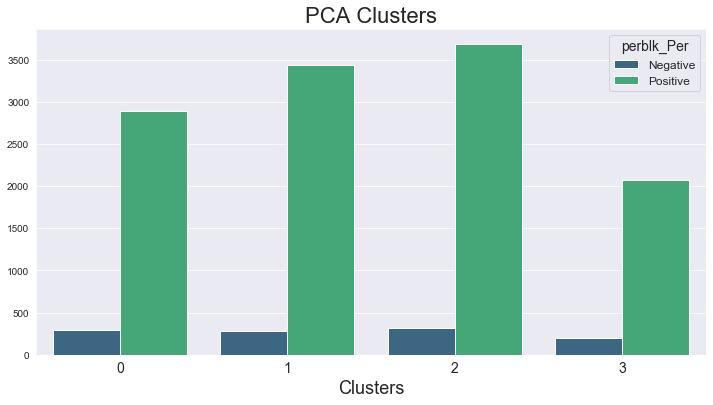

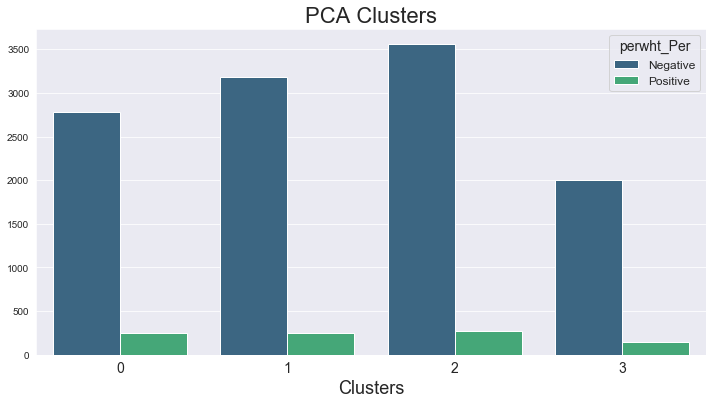

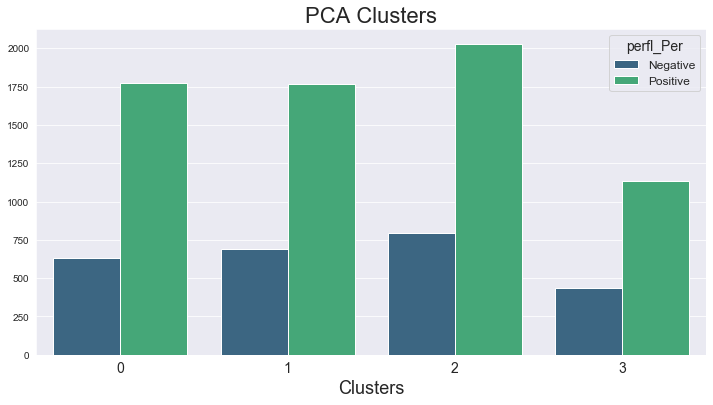

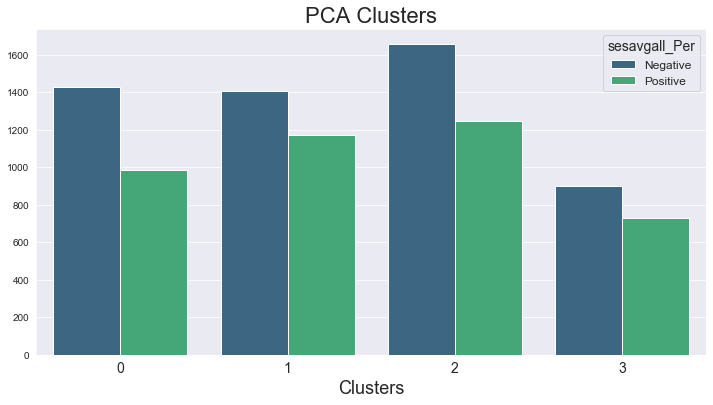

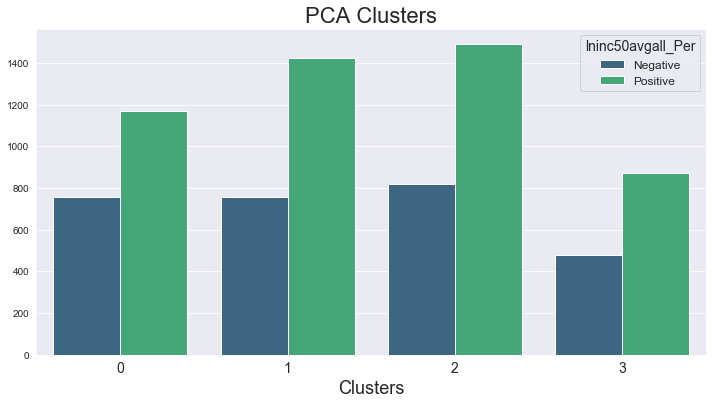

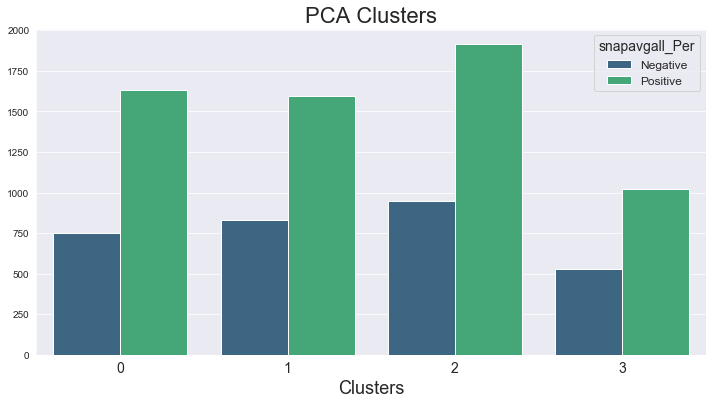

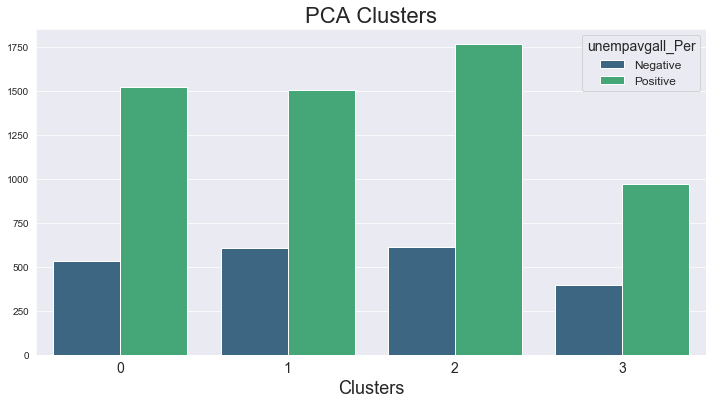

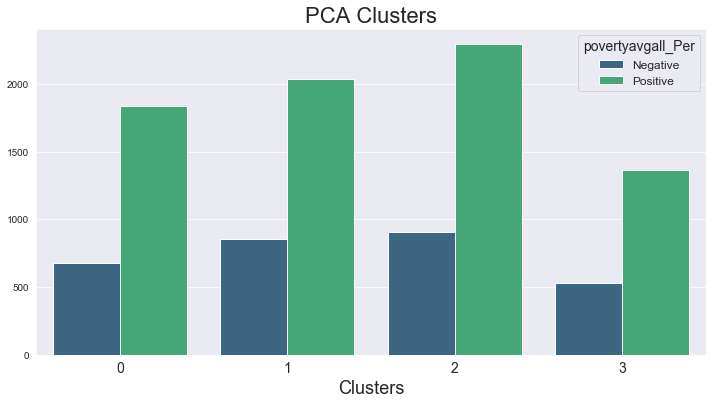

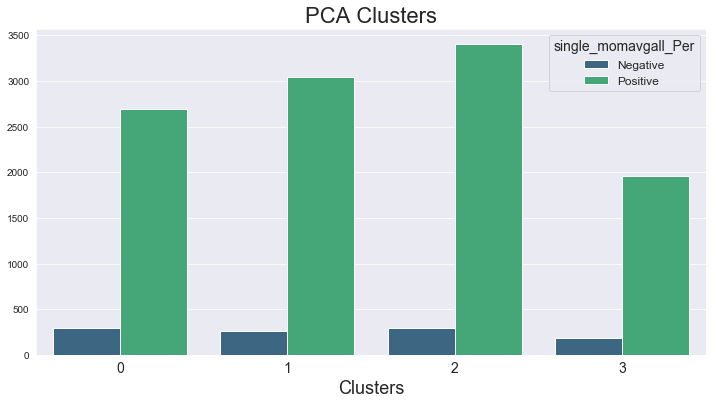

In [40]:
for i in ylist2:
    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot(1,1,1)
    sns.countplot(data=df_pca[df_pca[i]!=99],x='cluster',hue=i,ax=ax,palette='viridis')
    h, l = plt.gca().get_legend_handles_labels()
    plt.legend(h,['Negative','Positive'],ncol= 1, fontsize= 12, loc= 1,title= i,title_fontsize=14)
    plt.xlabel('Clusters',fontsize=18)
    plt.ylabel('')
    plt.xticks(fontsize=14) 
    plt.title('PCA Clusters', fontsize=22);

In [41]:
df_pca

,pc1,pc2,pc3,pc4,perblk,perwht,perfl,sesavgall,lninc50avgall,snapavgall,unempavgall,povertyavgall,single_momavgall,perblk_Per,perwht_Per,perfl_Per,sesavgall_Per,lninc50avgall_Per,snapavgall_Per,unempavgall_Per,povertyavgall_Per,single_momavgall_Per,cluster
0,-180.532664,-25.846080,4.836955,0.790415,0.190741,0.109523,0.587598,0.458852,11.133888,0.067104,0.079428,0.119076,0.223714,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,1.0,2
1,-656.908327,-9.937501,5.852386,-1.611204,0.066291,0.821078,0.368584,0.121226,10.826043,0.103863,0.074179,0.138230,0.162085,99.0,1.0,0.0,99.0,1.0,99.0,99.0,99.0,99.0,0
2,628.295431,20.185278,30.209547,0.207072,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0,1
3,674.139581,34.473903,-19.759045,-0.860801,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0,3
4,898.275455,-43.495801,3.490361,3.291298,0.317820,0.550232,0.415558,-0.009088,10.763999,0.122826,0.077415,0.150659,0.177371,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18954,-548.860652,-3.336060,21.695255,3.282857,0.149848,0.321962,0.744699,-0.752891,10.732240,0.168259,0.090207,0.211663,0.256123,1.0,99.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0,0
18955,951.674823,17.560413,-39.964946,3.722822,0.057664,0.793897,0.460050,0.047187,10.812994,0.129637,0.066748,0.125135,0.196005,1.0,0.0,1.0,0.0,99.0,1.0,1.0,99.0,1.0,3
18956,-64.541378,-26.312249,14.937333,-7.803909,0.406025,0.096791,0.773434,-0.487275,10.831886,0.163585,0.098632,0.201513,0.303038,1.0,0.0,1.0,0.0,99.0,1.0,1.0,1.0,1.0,2
18957,1045.521891,103.329079,18.916155,23.439970,0.775942,0.146688,0.729211,-0.277253,10.868320,0.133457,0.084581,0.214842,0.340375,1.0,0.0,99.0,99.0,1.0,99.0,99.0,99.0,1.0,3
